<a href="https://colab.research.google.com/github/aryalal11/RealEstatePricePrediction/blob/main/RealEstatePrediction(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
house_df=pd.read_csv('realestate_prices.csv')

In [5]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
print(house_df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


<Axes: xlabel='sqft_living', ylabel='price'>

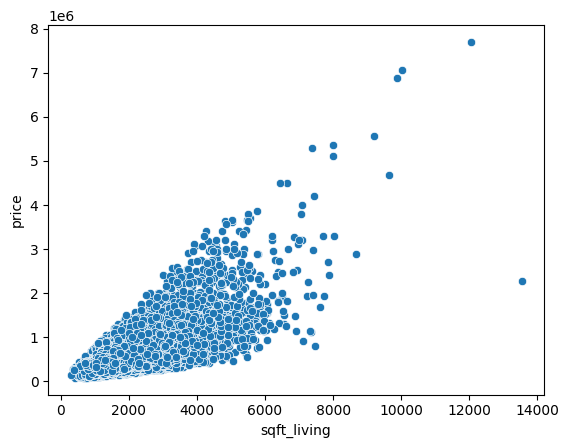

In [8]:
sns.scatterplot(x='sqft_living',y='price',data=house_df)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

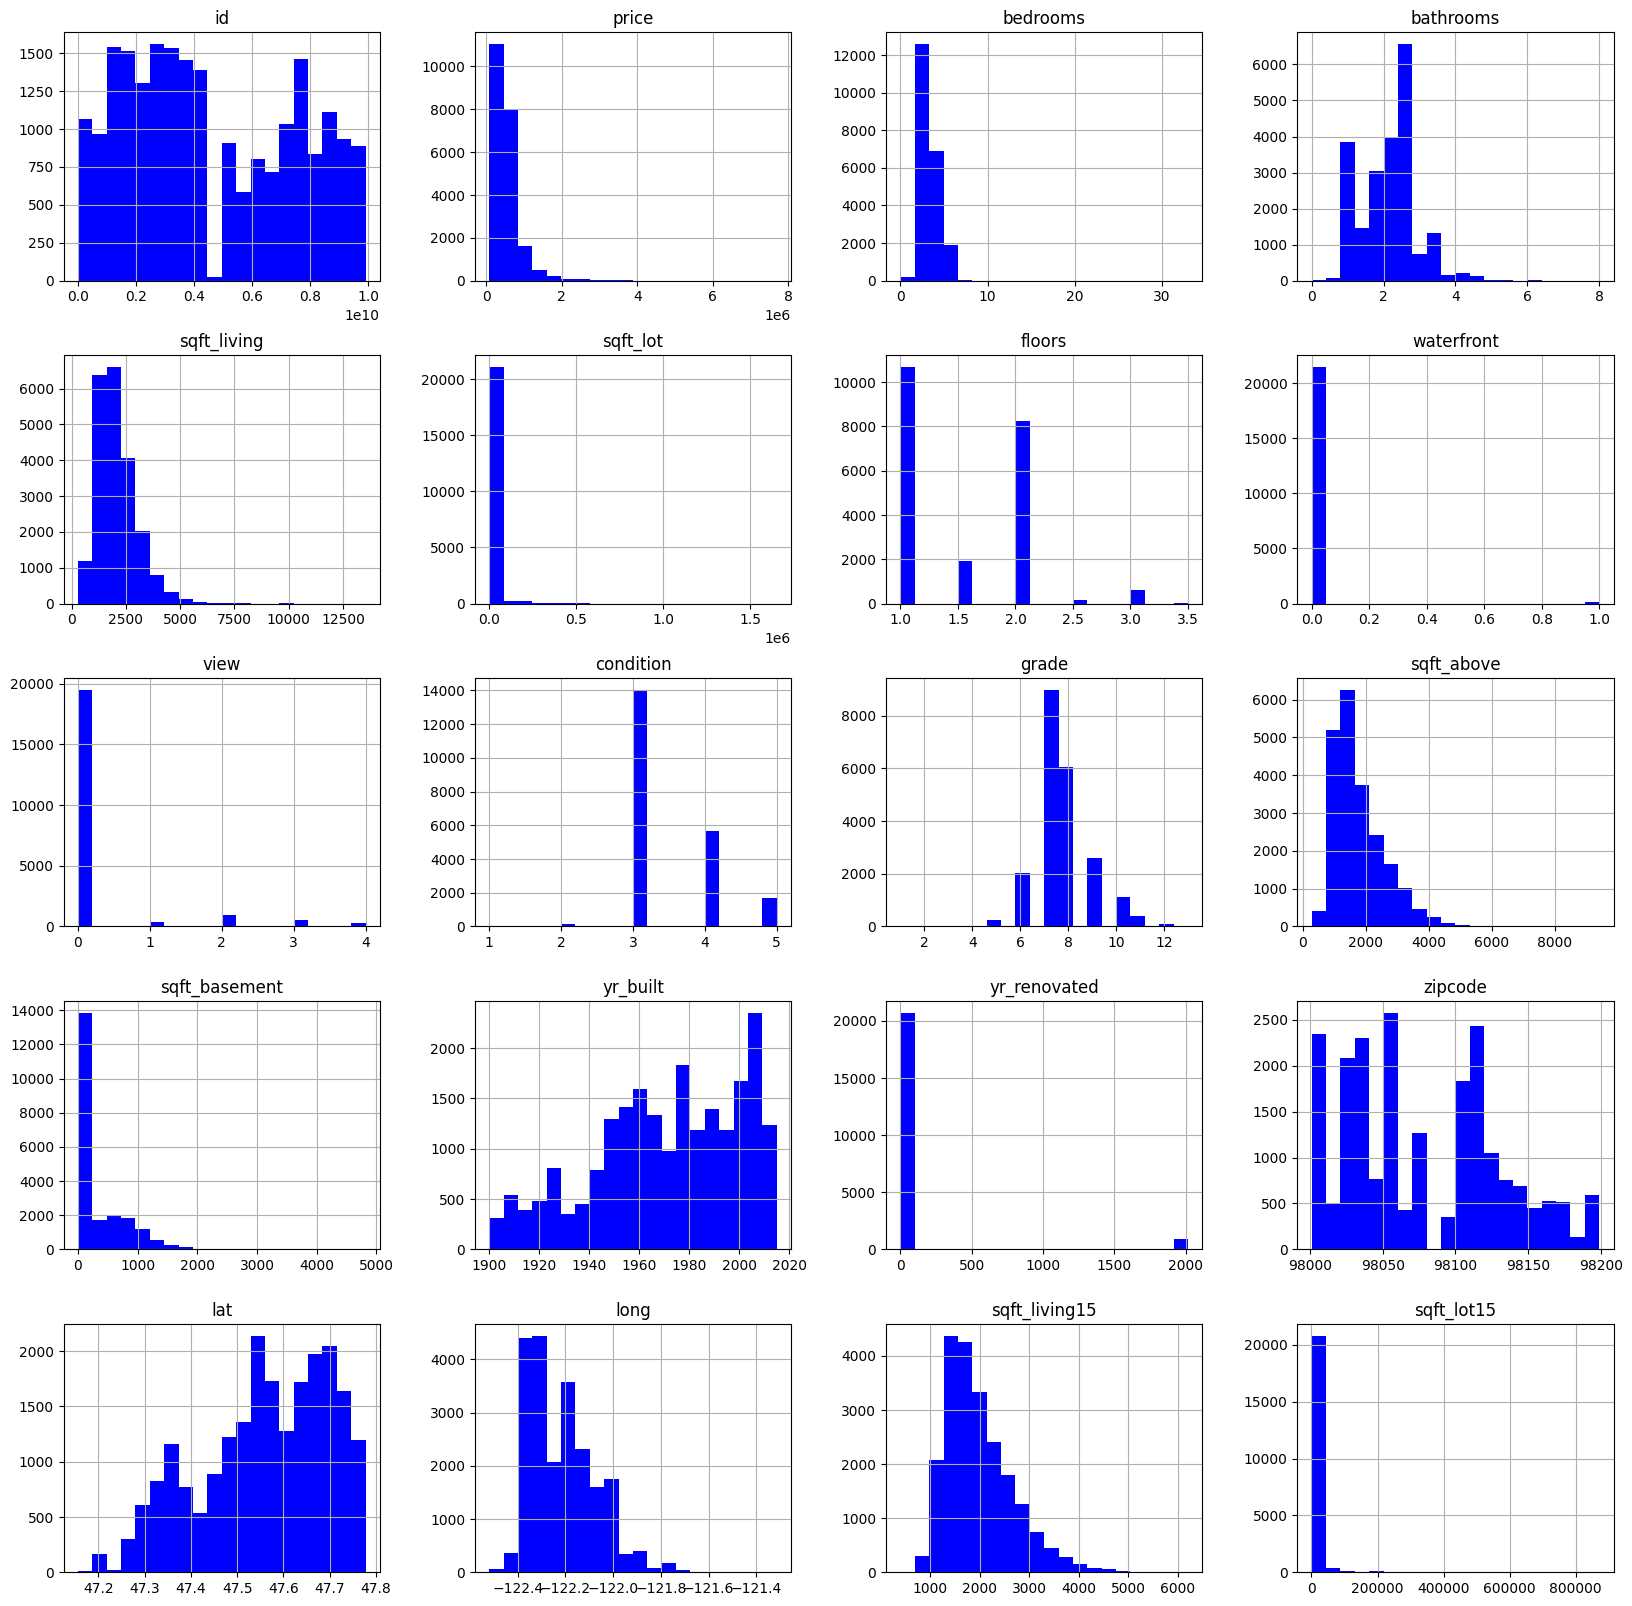

In [9]:
house_df.hist(bins=20,figsize=(20,20),color='b')

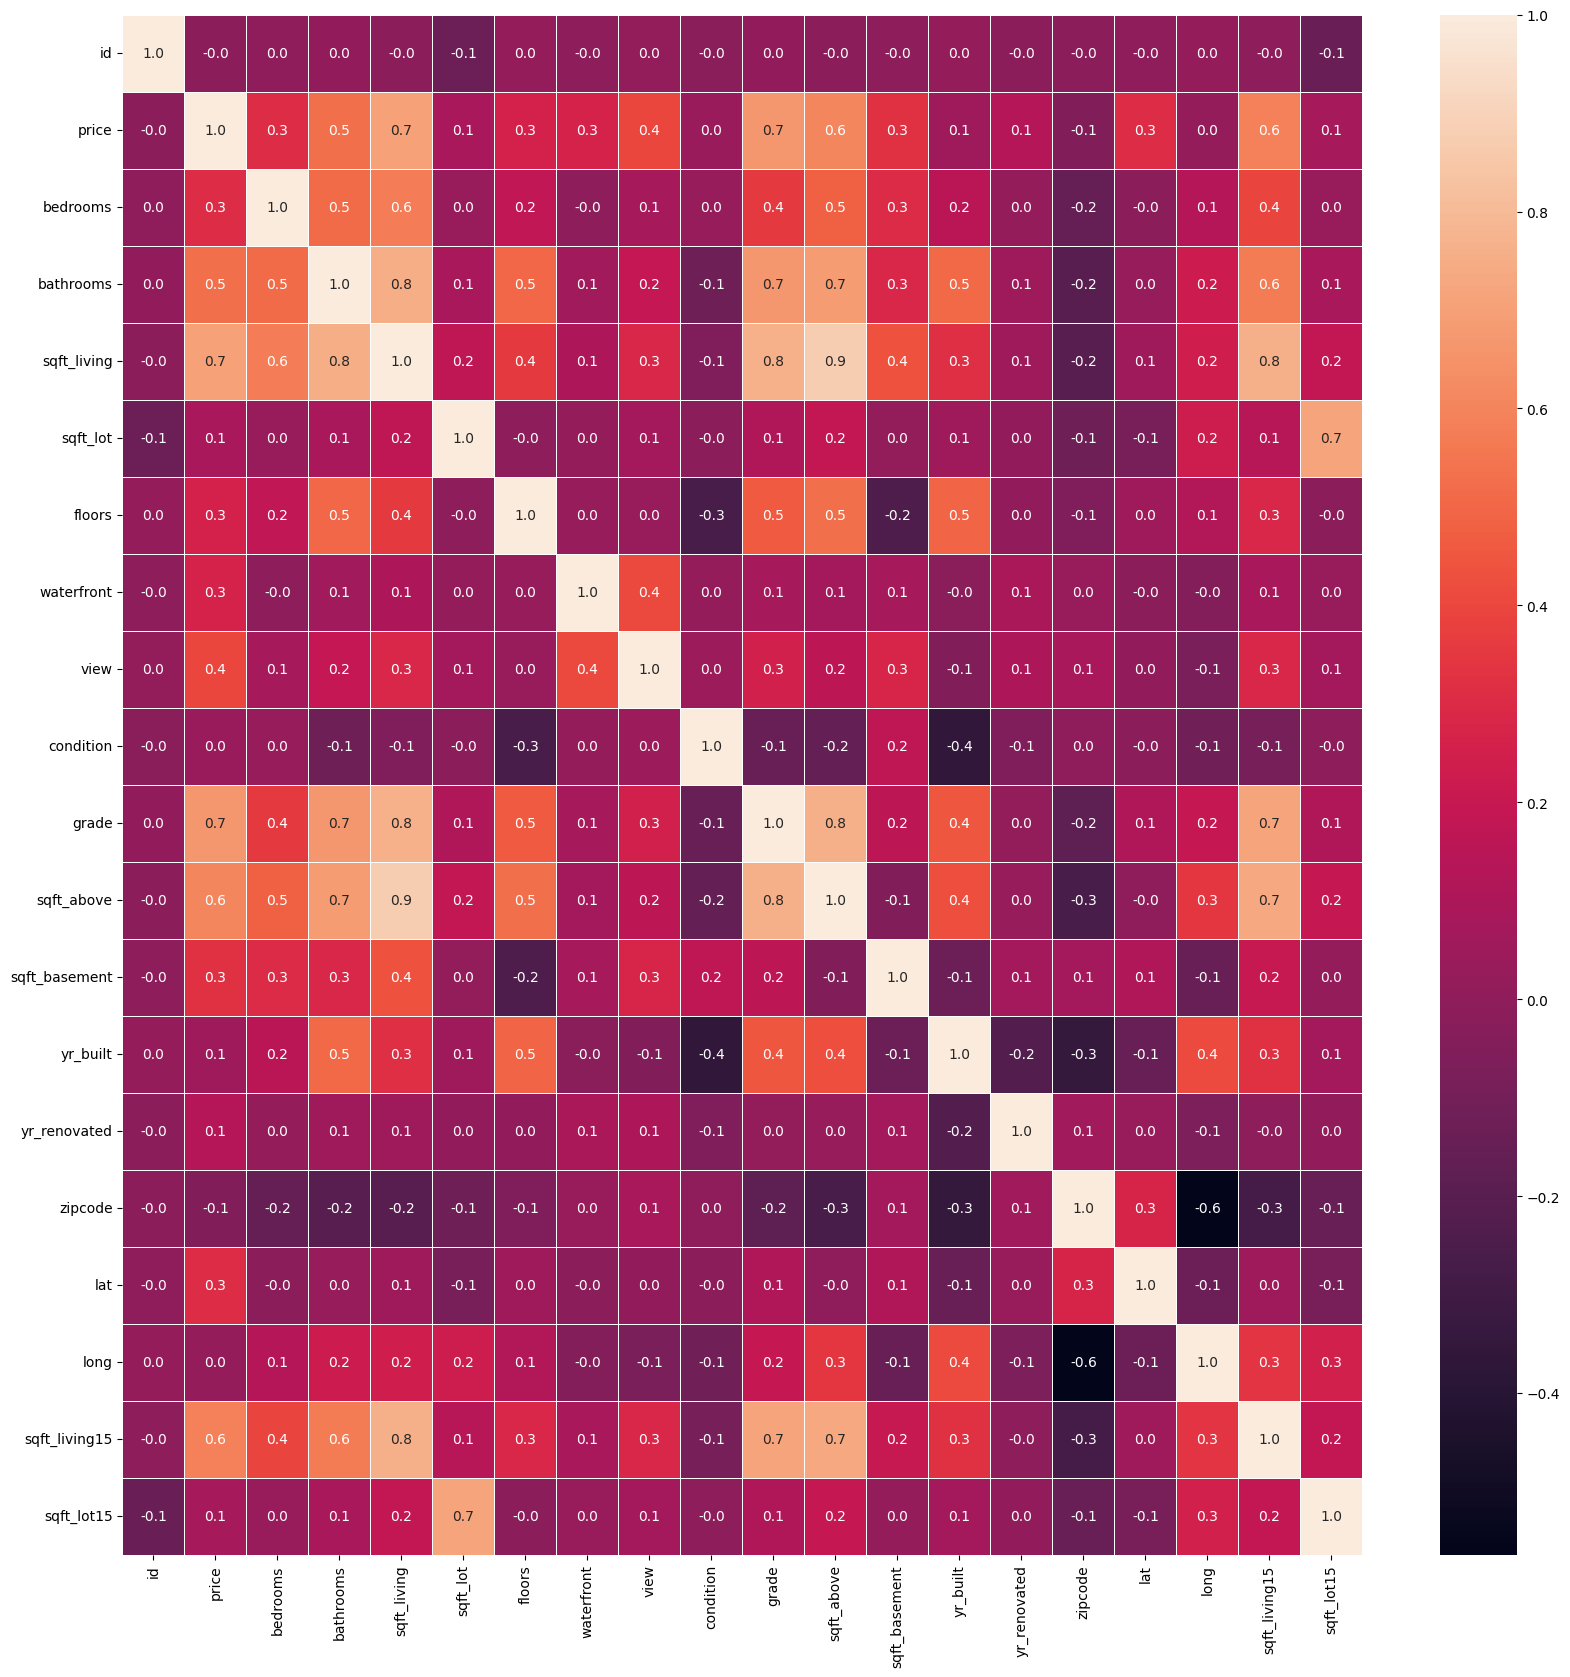

In [10]:
new_df=house_df.drop(['date'],axis=1)
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

In [11]:
house_df_sample=house_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built']]

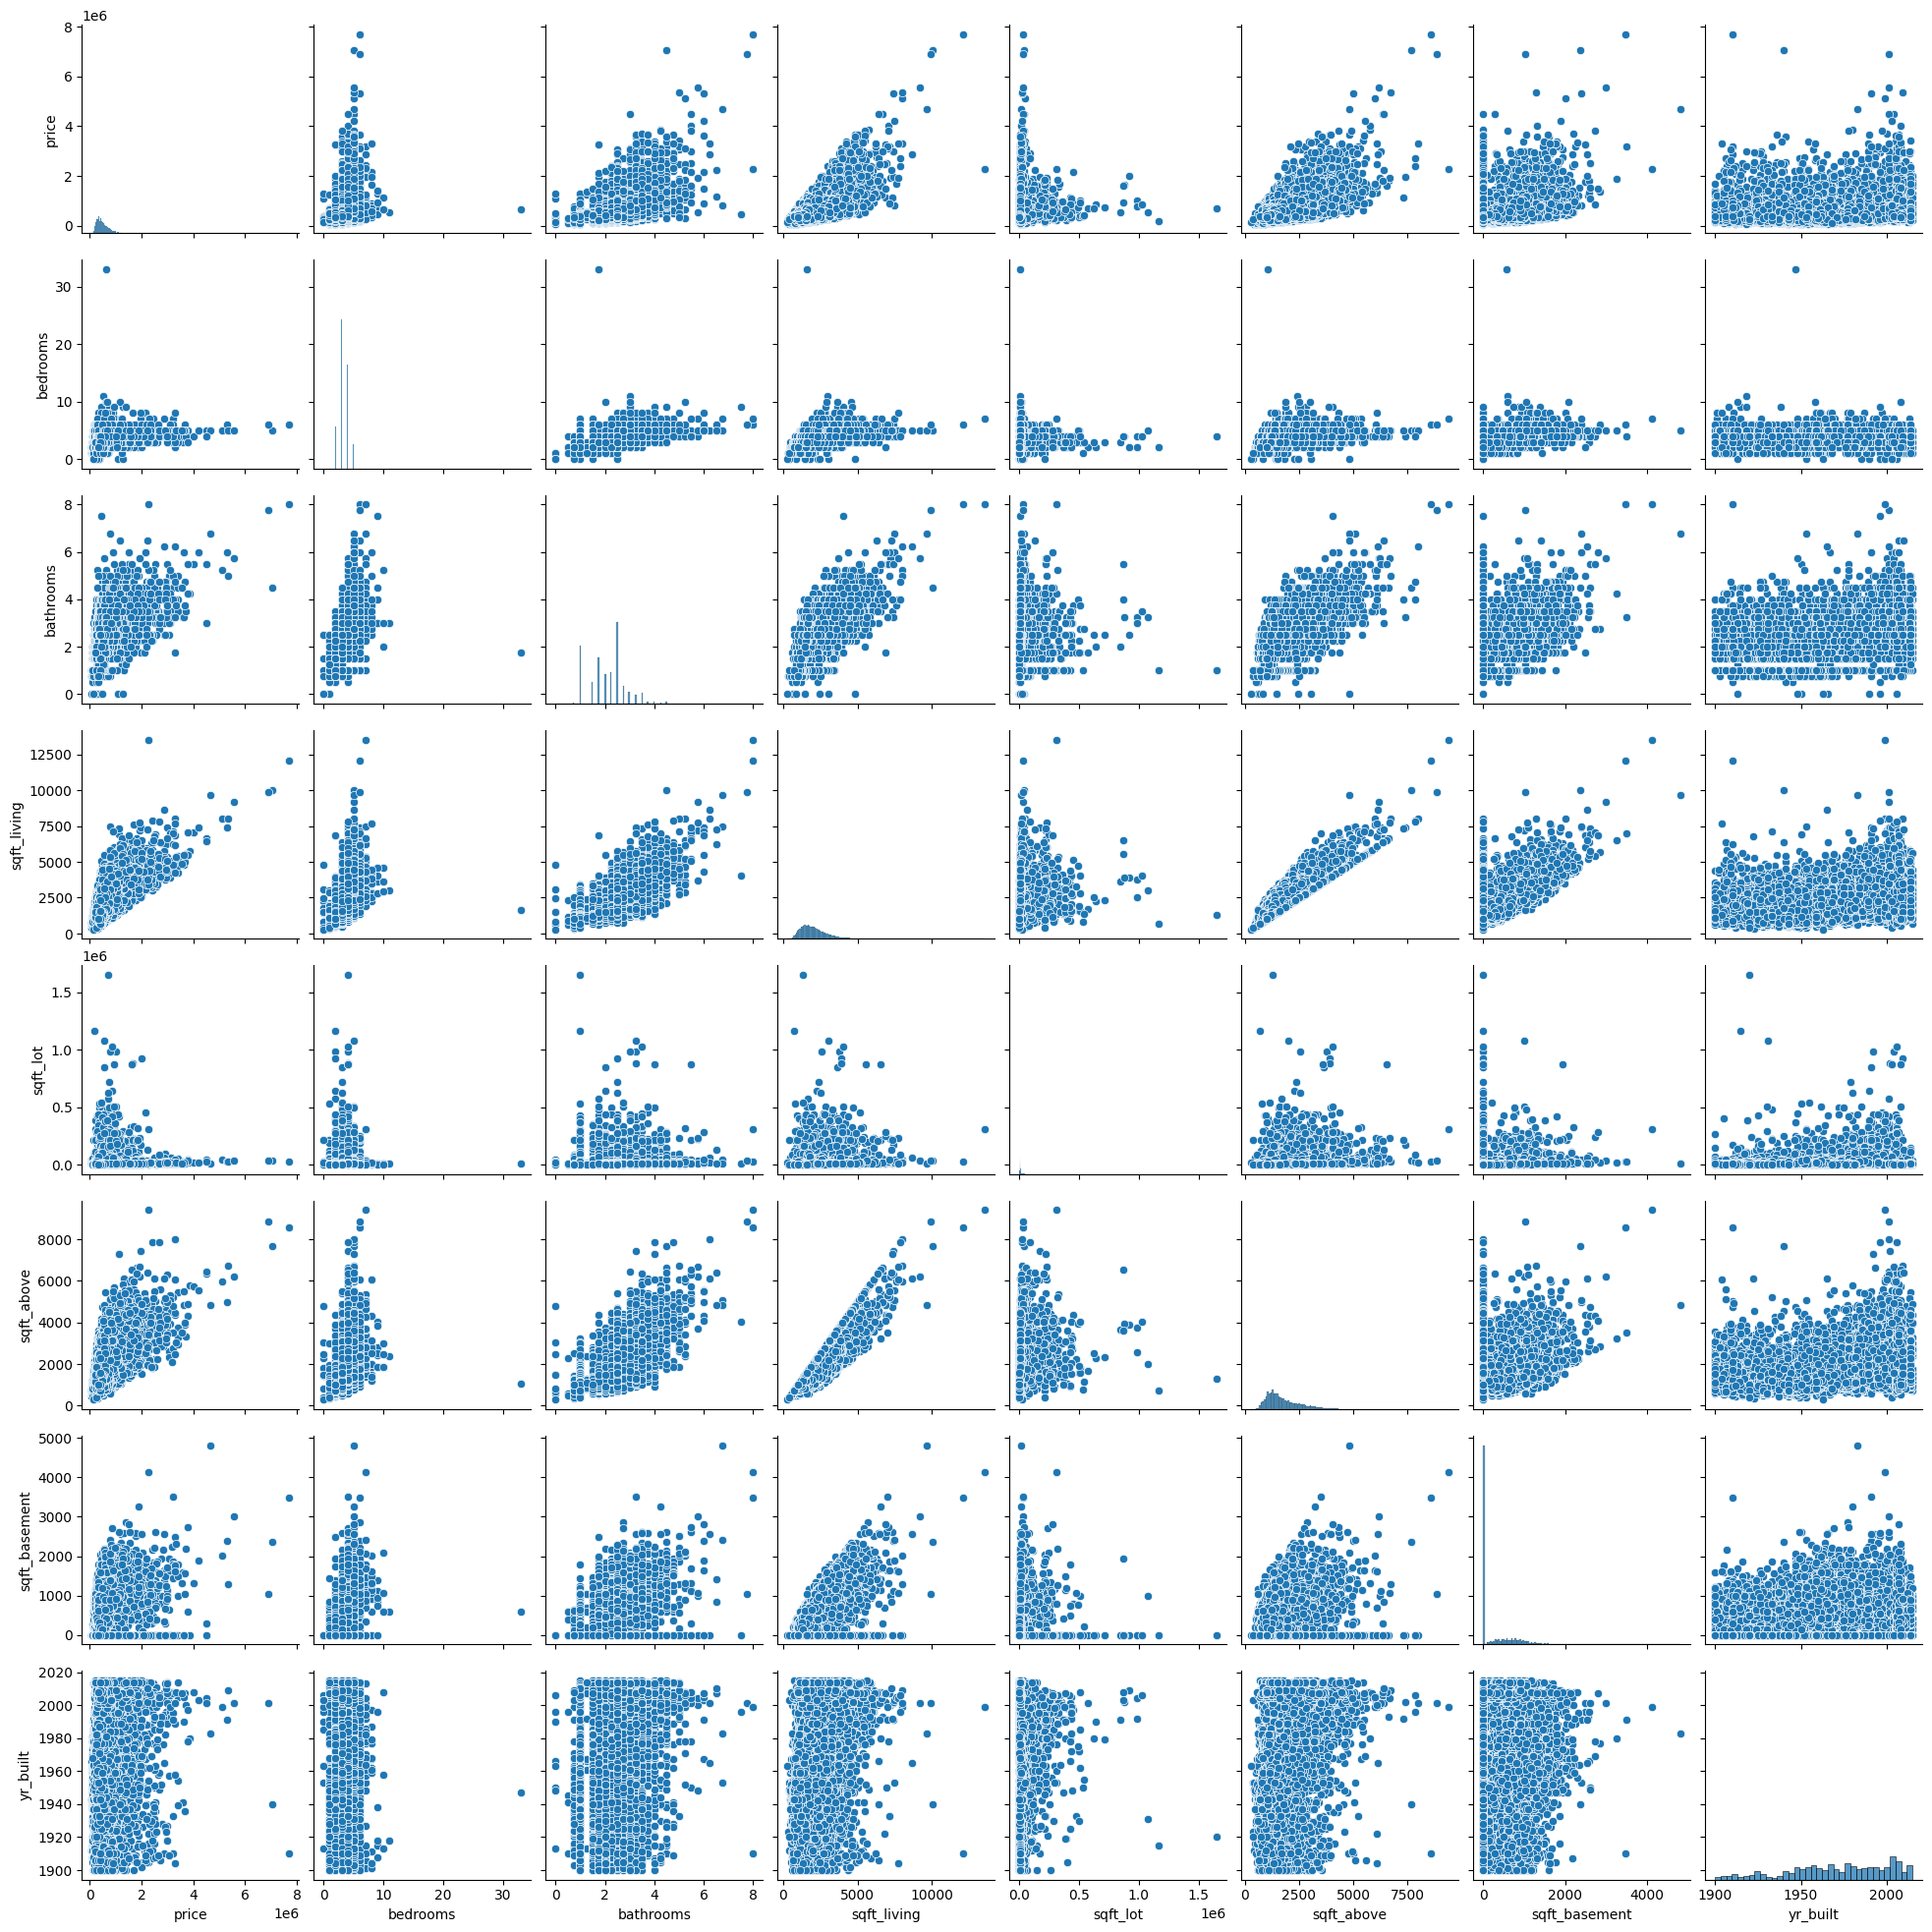

In [12]:
sns.pairplot(house_df_sample)

In [13]:
selected_features=['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built']

In [14]:
x=house_df[selected_features]

In [15]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1180,0,1955
1,3,2.25,2570,7242,2170,400,1951
2,2,1.00,770,10000,770,0,1933
3,4,3.00,1960,5000,1050,910,1965
4,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,1530,0,2009
21609,4,2.50,2310,5813,2310,0,2014
21610,2,0.75,1020,1350,1020,0,2009
21611,3,2.50,1600,2388,1600,0,2004


In [16]:
y=house_df['price']

In [17]:
x.shape

(21613, 7)

In [18]:
y.shape

(21613,)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
x_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.09758772, 0.        ,
        0.47826087],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.20614035, 0.08298755,
        0.44347826],
       [0.06060606, 0.125     , 0.03622642, ..., 0.05263158, 0.        ,
        0.28695652],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.08004386, 0.        ,
        0.94782609],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.14364035, 0.        ,
        0.90434783],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.08004386, 0.        ,
        0.93913043]])

In [21]:
x_scaled.shape

(21613, 7)

In [22]:
y=y.values.reshape(-1,1)

In [23]:
y_scaled=scaler.fit_transform(y)

In [24]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.25)

In [26]:
x_train.shape

(16209, 7)

In [27]:
x_test.shape

(5404, 7)

In [28]:
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(100,input_dim=7,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,401 (161.72 KB)

 Trainable params: 41,401 (161.72 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [31]:
epochs_hist=model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.3007e-04 - val_loss: 0.0011
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9360e-04 - val_loss: 9.7575e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7334e-04 - val_loss: 0.0010
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0541e-04 - val_loss: 9.5355e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2097e-04 - val_loss: 0.0011
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9272e-04 - val_loss: 0.0010
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7870e-04 - val_loss: 8.8960e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4782e-04 - val_loss: 9.2845e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7309e-04 - val_loss: 9.7383e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7608e-04 

In [32]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

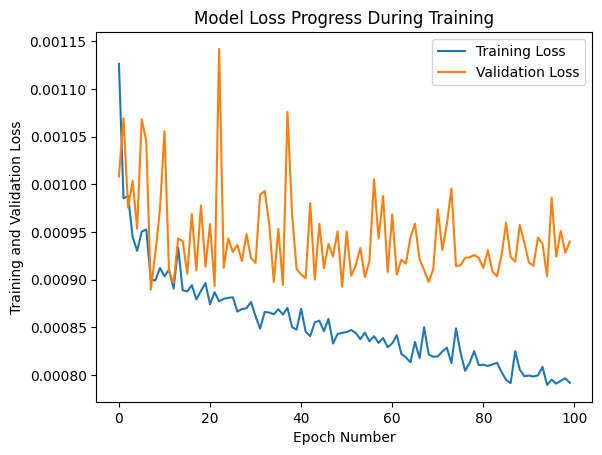

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [34]:
x_test_1=np.array([[4,3,1960,5000,1,2000,3000]])
scaler_1=MinMaxScaler()
x_test_scaled_1=scaler_1.fit_transform(x_test_1)
y_predict_1=model.predict(x_test_scaled_1)
y_predict_1=scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[179747.55]], dtype=float32)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0, 0.5, 'Predicted Labels')

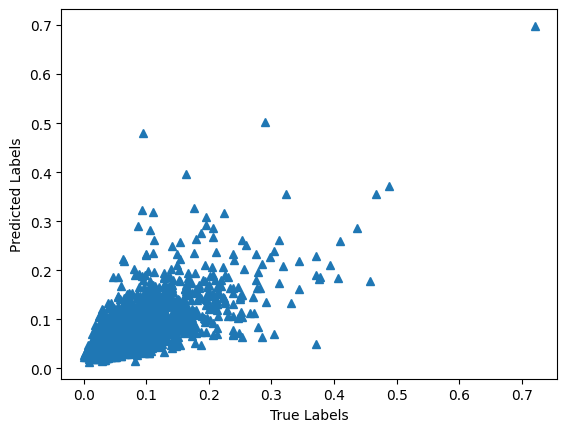

In [35]:
y_predict=model.predict(x_test)
plt.plot(y_test,y_predict,'^')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

In [36]:
y_predict_orig=scaler.inverse_transform(y_predict)
y_test_orig=scaler.inverse_transform(y_test)

(0.0, 3000000.0)

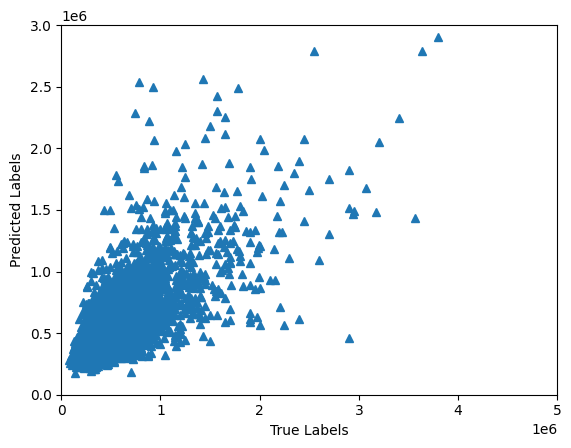

In [37]:
plt.plot(y_test_orig,y_predict_orig,'^')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.xlim(0,5000000)
plt.ylim(0,3000000)

In [38]:
k = x_test.shape[1]
n = len(x_test)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt
rmse=float(f"{sqrt(mean_squared_error(y_test_orig,y_predict_orig)):.3f}")
mse=mean_squared_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
mae=mean_absolute_error(y_test_orig,y_predict_orig)
print('RMSE=',rmse)
print('MSE=',mse)
print('R2=',r2)
print('Adjusted R2=',adj_r2)
print('MAE=',mae)

RMSE= 234201.243
MSE= 54850222348.73704
R2= 0.538436786522815
Adjusted R2= 0.5378380203081485
MAE= 149791.77146847243


In [40]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [41]:
x=house_df[selected_features]

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [43]:
y=house_df['price']

In [44]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.25)

In [45]:
model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')